In [ ]:
import os
import glob
import shutil

In [ ]:
Train_DIR = './Dataset'
org_dir= '/content/Train'
CLASS = ['Locked', ' Unlocked']

In [ ]:
for c in CLASS:
  DEST = os.path.join(Train_DIR,c)

  if not os.path.exists(DEST):
    os.makedirs(DEST)

In [ ]:

for img_path in glob.glob(os.path.join(org_dir,c)+ '*'):
    SRC =img_path

    shutil.copy(SRC ,DEST)


In [ ]:
os.listdir("/content/Train")

['Locked', 'Unlocked']

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.layers import Dense, Dropout, Flatten
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from keras.applications.inception_v3 import InceptionV3,preprocess_input
import keras

In [ ]:
base_model = InceptionV3(input_shape=(256,256,3), include_top= False)

In [ ]:
for layer in base_model.layers:
  	layer.trainable = False

In [ ]:
X= Flatten()(base_model.output)
X=Dense(units=2, activation='sigmoid')(X)

model = Model(base_model.input, X)

model.compile(optimizer ='adam', loss = keras.losses.binary_crossentropy, metrics = ['accuracy'])
model.summary()



# Pre-process

In [ ]:
train_datagen = ImageDataGenerator(featurewise_center = True, rotation_range = 30,
                                   width_shift_range= 0.3,
                                   horizontal_flip= 0.5,
                                   preprocessing_function = preprocess_input,
                                   zoom_range = 0.4,
                                   shear_range=0.4)
"""
datagen = ImageDataGenerator(rotation_range=30, horizontal_flip=0.5)
datagen.fit(img)
i=0
for img_batch in datagen.flow(img, batch_size=9):

    for img in img_batch:
        plt.subplot(330 + 1 + i)
        plt.imshow(img)
        i=i+1
    if i >= batch_size:
        break

"""
train_data = train_datagen.flow_from_directory(directory="/content/Train",
                                               target_size=(256,256),
                                               batch_size=64)


Found 702 images belonging to 2 classes.


In [ ]:
train_data.class_indices

{'Locked': 0, 'Unlocked': 1}

In [ ]:
t_image,label = train_data.next()
t_image

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


array([[[[-0.75686276, -0.7490196 , -0.7882353 ],
         [-0.75686276, -0.7490196 , -0.7882353 ],
         [-0.75686276, -0.7490196 , -0.7882353 ],
         ...,
         [-0.827451  , -0.827451  , -0.8349618 ],
         [-0.827451  , -0.827451  , -0.84313726],
         [-0.8152969 , -0.8152969 , -0.83098316]],

        [[-0.75686276, -0.7490196 , -0.7882353 ],
         [-0.75686276, -0.7490196 , -0.7882353 ],
         [-0.75686276, -0.7490196 , -0.7882353 ],
         ...,
         [-0.827451  , -0.827451  , -0.83225226],
         [-0.827451  , -0.827451  , -0.84313726],
         [-0.8193611 , -0.8193611 , -0.83504736]],

        [[-0.75686276, -0.7490196 , -0.7882353 ],
         [-0.75686276, -0.7490196 , -0.7882353 ],
         [-0.75686276, -0.7490196 , -0.7882353 ],
         ...,
         [-0.827451  , -0.827451  , -0.8295428 ],
         [-0.827451  , -0.827451  , -0.84313726],
         [-0.8234253 , -0.8234253 , -0.83911157]],

        ...,

        [[-0.99215686, -0.99215686, -0

In [ ]:
def plotImages(img_arr, label):
  for idx, img in enumerate(img_arr):
    if idx <= 10 :
      plt.figure(figsize= (5,5))
      plt.imshow(img)
      plt.title(img.shape)
      plt.axis = False
      plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


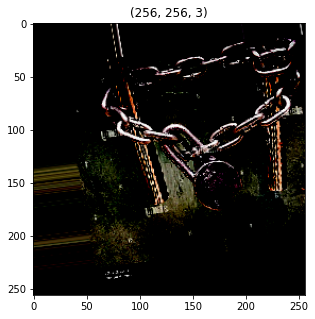

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


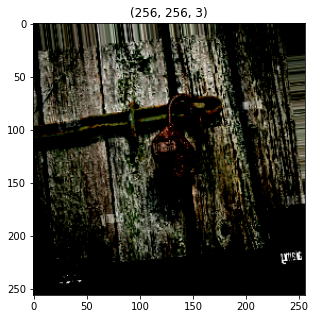

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


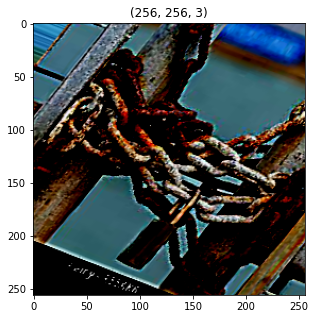

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


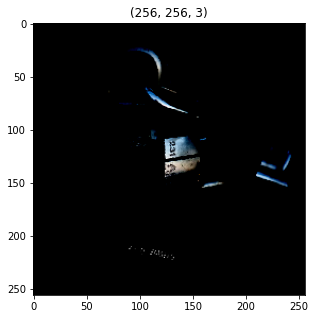

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


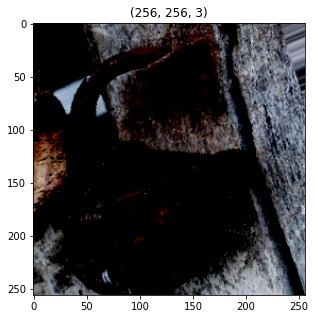

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


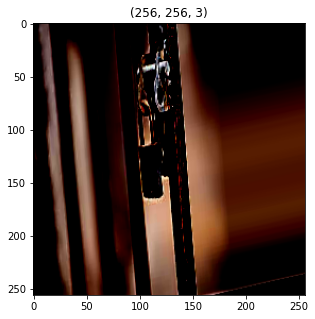

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


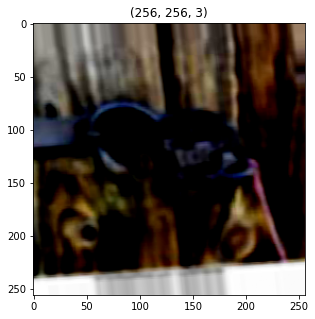

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


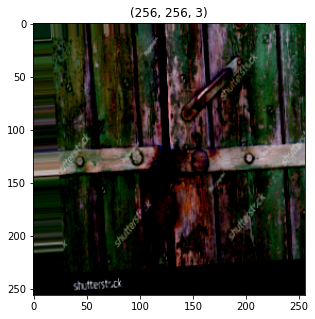

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


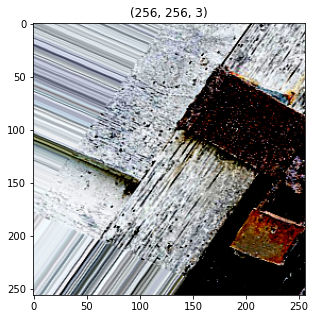

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


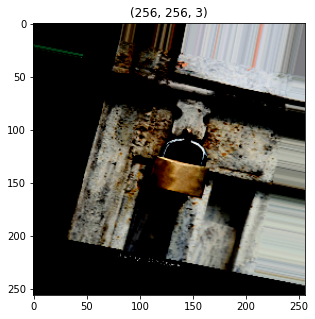

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


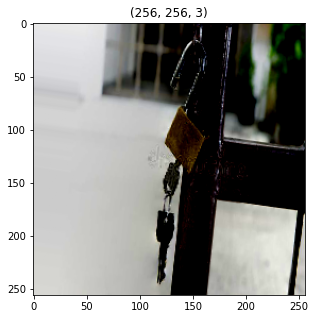

In [ ]:
 plotImages(t_image, label)

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

mc = ModelCheckpoint(filepath= './best_model.h5',
                     monitor = 'accuracy',
                     verbose = 1 ,
                     save_best_only= True)
es = EarlyStopping( monitor = 'accuracy',
                   min_delta = 0.01,
                   patience = 5 ,
                   verbose = 1)

cb = [mc,es]

In [ ]:
his = model.fit(train_data,
                          steps_per_epoch = 5,
                          epochs= 40,
                          callbacks=cb)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/40
5/5 [==============================] - ETA: 0s - loss: 6.1193 - accuracy: 0.5094
Epoch 1: accuracy improved from -inf to 0.50937, saving model to ./best_model.h5
5/5 [==============================] - 51s 9s/step - loss: 6.1193 - accuracy: 0.5094
Epoch 2/40
5/5 [==============================] - ETA: 0s - loss: 2.6313 - accuracy: 0.5781
Epoch 2: accuracy improved from 0.50937 to 0.57812, saving model to ./best_model.h5
5/5 [==============================] - 48s 9s/step - loss: 2.6313 - accuracy: 0.5781
Epoch 3/40
5/5 [==============================] - ETA: 0s - loss: 1.7998 - accuracy: 0.6509
Epoch 3: accuracy improved from 0.57812 to 0.65094, saving model to ./best_model.h5
5/5 [==============================] - 46s 9s/step - loss: 1.7998 - accuracy: 0.6509
Epoch 4/40
5/5 [==============================] - ETA: 0s - loss: 1.3579 - accuracy: 0.6478
Epoch 4: accuracy did not improve from 0.65094
5/5 [==============================] - 46s 9s/step - loss: 1.3579 - accuracy: 0.6

In [ ]:
from keras.models import load_model

model = load_model('/content/best_model.h5')

CM

In [ ]:
h= his.history
h.keys

<function dict.keys>

<function matplotlib.pyplot.show>

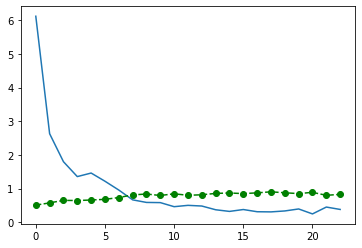

In [ ]:
plt.plot(h["loss"])
plt.plot(h['accuracy'], 'go--')
plt.show

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


the image is of a padlock locked


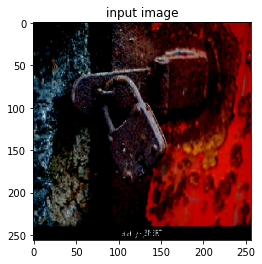

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


the image is of a padlock locked


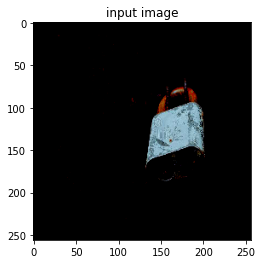

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


the image is of a padlock locked


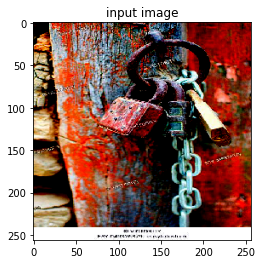

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


the image is of a padlock locked


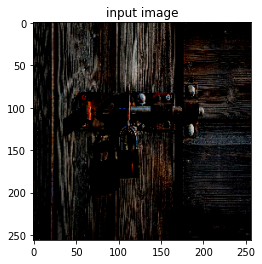

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


the image is of a padlock locked


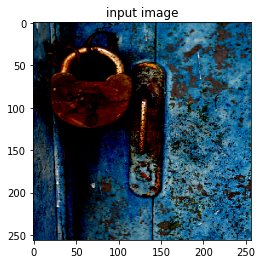

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


the image is of a padlock locked


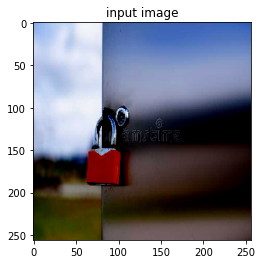

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


the image is of a padlock unlocked


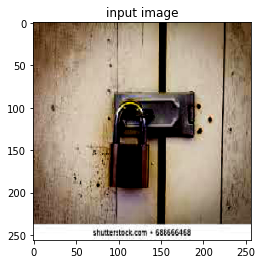

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


the image is of a padlock unlocked


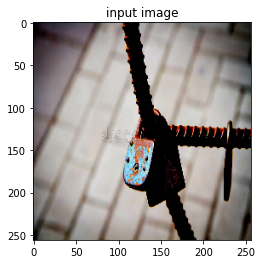

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


the image is of a padlock unlocked


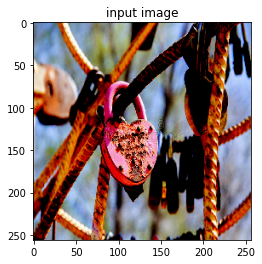

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


the image is of a padlock locked


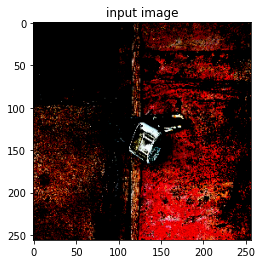

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


the image is of a padlock unlocked


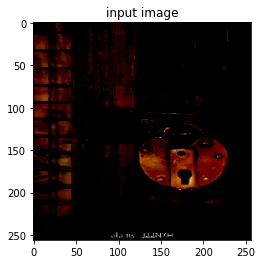

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


the image is of a padlock unlocked


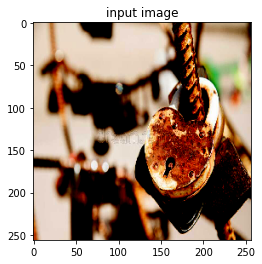

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


the image is of a padlock locked


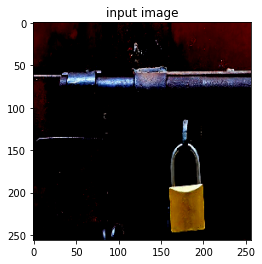

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


the image is of a padlock locked


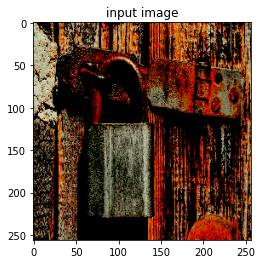

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


the image is of a padlock locked


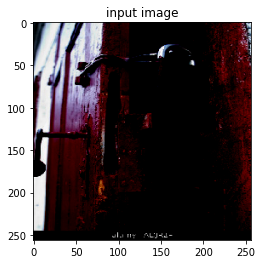

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


the image is of a padlock unlocked


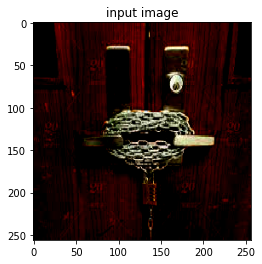

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


the image is of a padlock locked


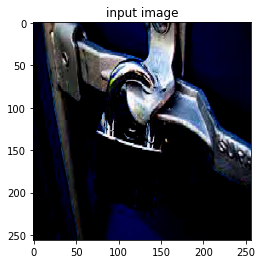

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


the image is of a padlock locked


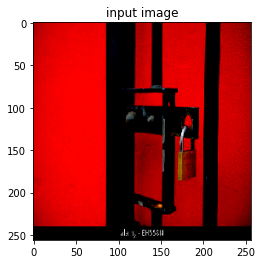

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


the image is of a padlock locked


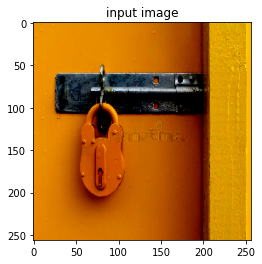

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


the image is of a padlock locked


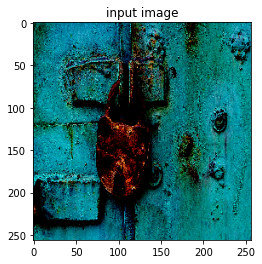

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


the image is of a padlock locked


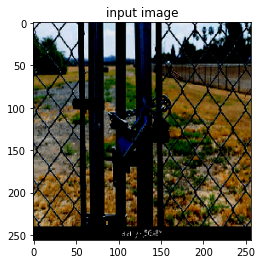

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


the image is of a padlock locked


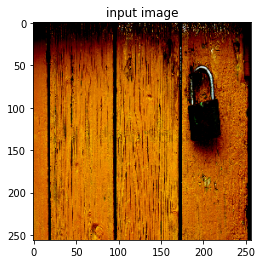

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


the image is of a padlock unlocked


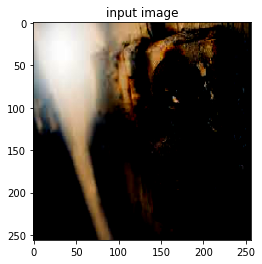

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


the image is of a padlock unlocked


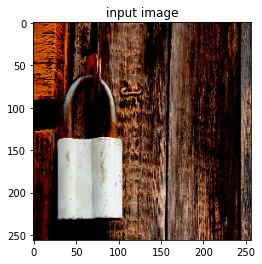

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


the image is of a padlock unlocked


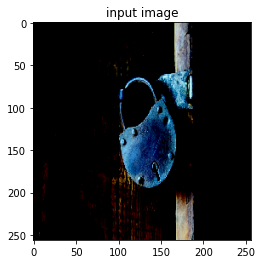

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


the image is of a padlock locked


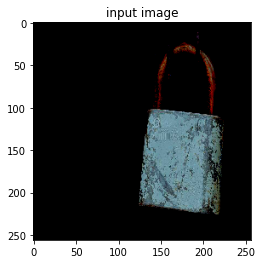

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


the image is of a padlock locked


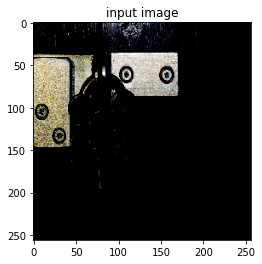

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


the image is of a padlock unlocked


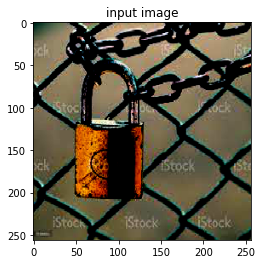

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


the image is of a padlock locked


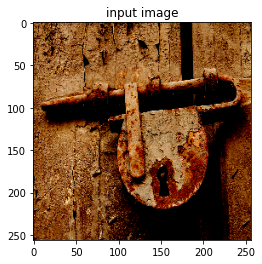

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


the image is of a padlock unlocked


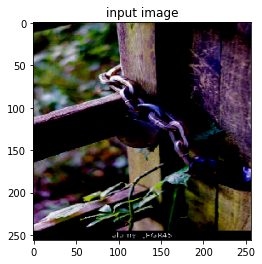

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


the image is of a padlock unlocked


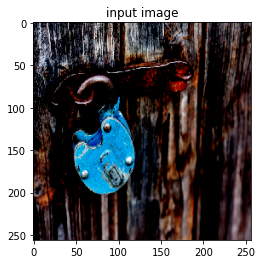

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


the image is of a padlock unlocked


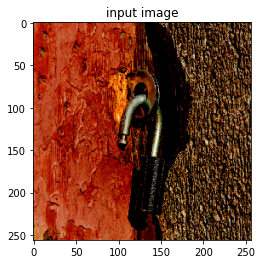

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


the image is of a padlock locked


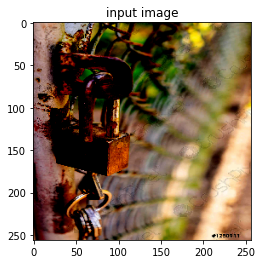

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


the image is of a padlock locked


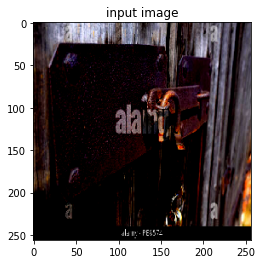

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


the image is of a padlock unlocked


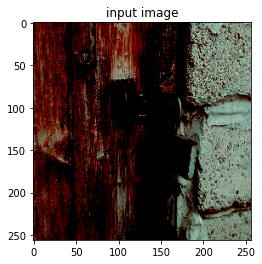

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


the image is of a padlock locked


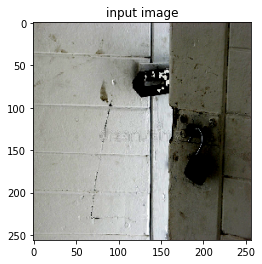

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


the image is of a padlock unlocked


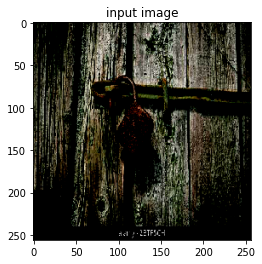

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


the image is of a padlock locked


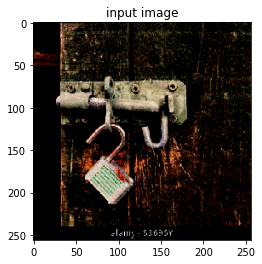

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


the image is of a padlock locked


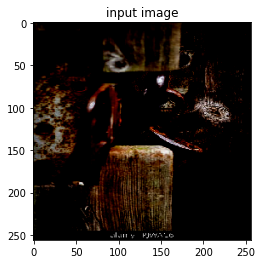

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


the image is of a padlock unlocked


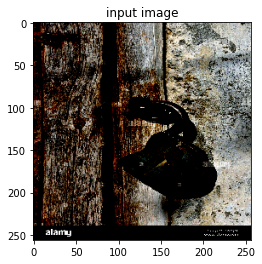

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


the image is of a padlock unlocked


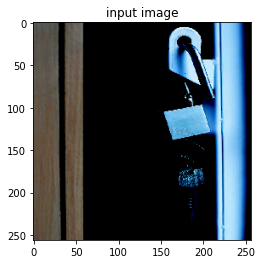

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


the image is of a padlock unlocked


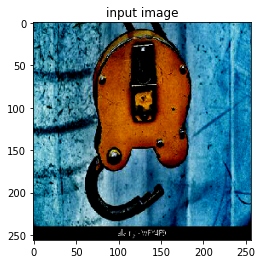

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


the image is of a padlock locked


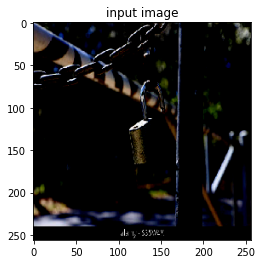

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


the image is of a padlock locked


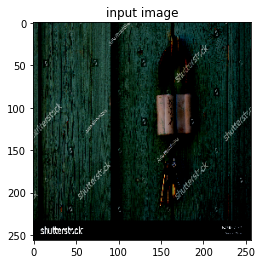

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


the image is of a padlock locked


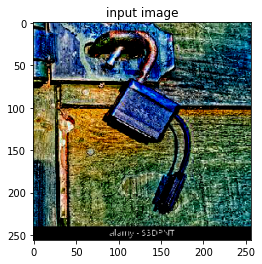

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


the image is of a padlock unlocked


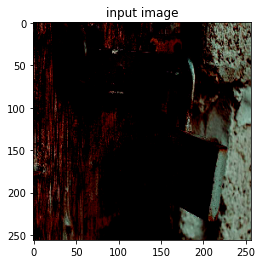

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


the image is of a padlock locked


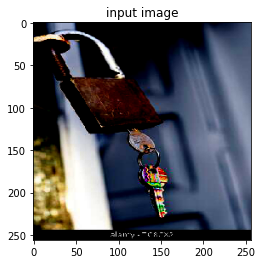

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


the image is of a padlock unlocked


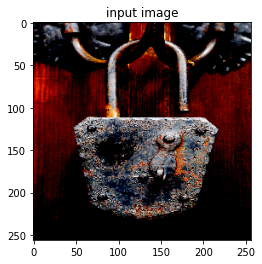

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


the image is of a padlock unlocked


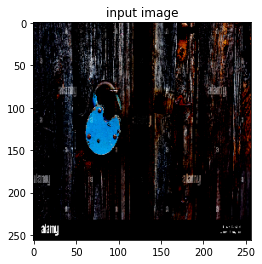

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


the image is of a padlock locked


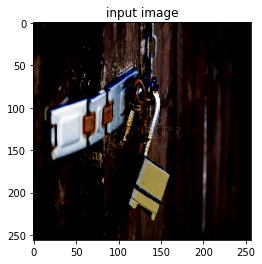

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


the image is of a padlock unlocked


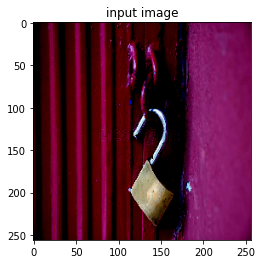

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


the image is of a padlock unlocked


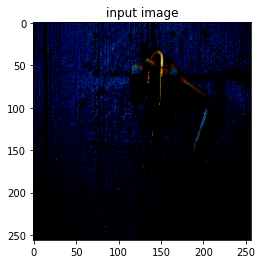

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


the image is of a padlock unlocked


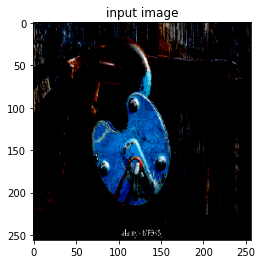

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


the image is of a padlock locked


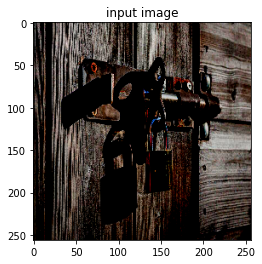

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


the image is of a padlock unlocked


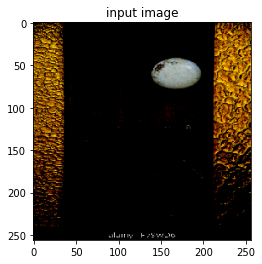

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


the image is of a padlock locked


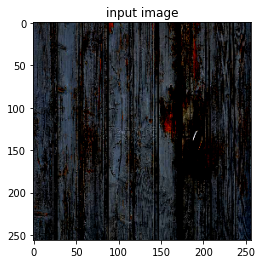

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


the image is of a padlock unlocked


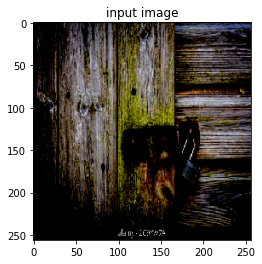

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


the image is of a padlock unlocked


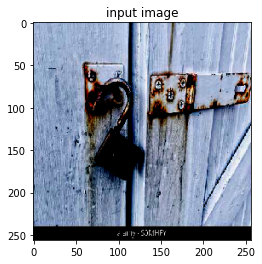

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


the image is of a padlock locked


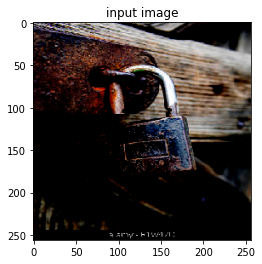

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


the image is of a padlock unlocked


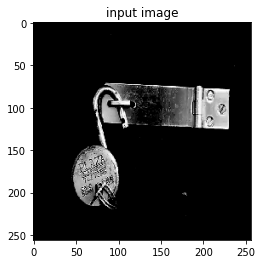

In [ ]:

for path in glob.iglob('/content/Test/' + '**/*.jpg', recursive=True):


    img = load_img(path, target_size=(256,256))

    i =img_to_array(img)
    i = preprocess_input(i)
    input_arr = np.array([i])
    input_arr.shape

    pred = np.argmax(model.predict(input_arr))

    if pred==0 :

       print("the image is of a padlock locked")
    else:
      print("the image is of a padlock unlocked")

    plt.imshow(input_arr[0])
    plt.title('input image')
    plt.axis = False
    plt.show()